# MCD

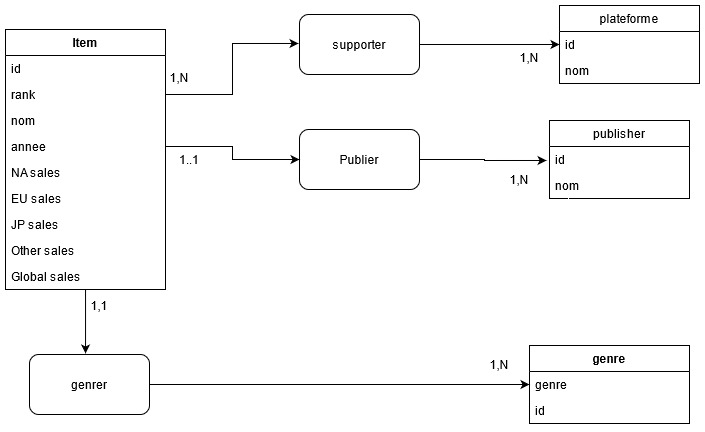

# Description du travail de création des bases

Dans un premier temps nous avons réfléchi à comment découper le dataset pour choisir les différentes tables à créer.

Ensuite nous avons séparé le travail en plusieurs tâches:

- la création de la base de données et des tables
- le traitement des données pour nettoyer des valeurs manquantes, création de nouveaux fichiers csv pour simplifier l'intégration des données et le remplacement des valeurs qualitatives par leurs id respectifs

## Création de la bdd

Nous nous sommes fixés sur une table "principale" et trois tables "indépendantes":
- table *genre* (indépendante): indique l'id et le genre de jeu
- table *publisher* (indépendante): indique l'id et l'éditeur du jeu
- table *plateforme* (indépendante): indique l'id et la plateforme
- table *vente* (principale): va renseigner toutes les entrées restantes
    - id_vente
    - rank : le classement du jeu en fonction de ses ventes dans le monde
    - nom_jeu : nom du jeu
    - id_plateforme
    - annee : année de sortie du jeu
    - id_genre
    - id_publisher
    - NA_sales : ventes en Amérique du nord
    - EU_sales : ventes en Europe
    - JP_sales : ventes au Japon
    - Other_sales : ventes dans les autres pays
    - Global_sales : ventes totales dans le monde

## Traitement des données

### Sur Jupyter Notebook et VSCode 

#### Importation des bibliothèques 

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from data_base import Bdd

#### Importation des données

In [2]:
df = pd.read_csv("vgsales_debase.csv")

#### Affichage des information de la bdd

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##### Affichage des valeurs uniques pour chaque colonne

In [4]:
for col in df :
    print(col, df[col].nunique())

Rank 16598
Name 11493
Platform 31
Year 39
Genre 12
Publisher 578
NA_Sales 409
EU_Sales 305
JP_Sales 244
Other_Sales 157
Global_Sales 623


In [5]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [6]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

On peut voir que l'on a dans la colonne *Year* 271 valeurs sont nulles et que la colonne *Publisher* en a 58.

Pour la colonne *Plublisher*, ça ne pose pas de problèmes, il s'agit de chaînes de caractères du coup on pourra les transformer sans imputer la bdd.

Pour la colonne *Year* ça sera plus compliqué. Les valeurs étant des integer, les remplacer par des string poserait problème tout comme mettre des valeurs standards. On a donc fait le choix de supprimer les lignes correspondantes (cela repésentait une perte de 1,6% des données)

#### Remplacement des valeurs nulles dans Publisher

In [8]:
df["Publisher"].fillna("Unknown", inplace=True)

#### suppression des lignes contenant des Nan (uniquement contenus dans la colonne Year qui seraient compliqués à remplacer)

In [9]:
df.dropna(inplace=True)

#### Vérification qu'on a plus de valeurs nulles

In [10]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Remplacement du type de la colonne Année de float vers int

In [11]:
df["Year"] = df["Year"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int32  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


#### Remplacement des valeurs par leurs id

In [12]:
def creer_dico(nom_dico, colonne):
    for i, colonne in enumerate(colonne.unique()):
        nom_dico[i+1] = colonne

In [13]:
dico_platforms = {}
dico_publishers = {}
dico_genres = {}
creer_dico(dico_platforms, df["Platform"])
creer_dico(dico_publishers, df["Publisher"])
creer_dico(dico_genres, df["Genre"])

In [14]:
for key, value in dico_publishers.items() :
    df["Publisher"].loc[df["Publisher"] == value] = key
for key, value in dico_platforms.items() :
    df["Platform"].loc[df["Platform"] == value] = key
for key, value in dico_genres.items() :
    df["Genre"].loc[df["Genre"] == value] = key

C:\Users\utilisateur\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
# vérification du changement
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,1,2006,1,1,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,2,1985,2,1,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,1,2008,3,1,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,1,2009,1,1,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,3,1996,4,1,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,3,1989,5,1,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,4,2006,2,1,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,1,2006,6,1,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,1,2009,2,1,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,2,1984,7,1,26.93,0.63,0.28,0.47,28.31


#### création de la colonne id pour la table vente

In [18]:
autoincrement = np.array([i+1 for i in range(df.shape[0])])

In [19]:
df.insert(0,"id", autoincrement)

#### Exportation du Dataframe en fichier csv

In [20]:
df.to_csv("videogames.csv", index=False)

In [22]:
vg = pd.read_csv("videogames.csv")

In [23]:
vg.head(10)

,id,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,1,Wii Sports,1,2006,1,1,41.49,29.02,3.77,8.46,82.74
1,2,2,Super Mario Bros.,2,1985,2,1,29.08,3.58,6.81,0.77,40.24
2,3,3,Mario Kart Wii,1,2008,3,1,15.85,12.88,3.79,3.31,35.82
3,4,4,Wii Sports Resort,1,2009,1,1,15.75,11.01,3.28,2.96,33.00
4,5,5,Pokemon Red/Pokemon Blue,3,1996,4,1,11.27,8.89,10.22,1.00,31.37
5,6,6,Tetris,3,1989,5,1,23.20,2.26,4.22,0.58,30.26
6,7,7,New Super Mario Bros.,4,2006,2,1,11.38,9.23,6.50,2.90,30.01
7,8,8,Wii Play,1,2006,6,1,14.03,9.20,2.93,2.85,29.02
8,9,9,New Super Mario Bros. Wii,1,2009,2,1,14.59,7.06,4.70,2.26,28.62
9,10,10,Duck Hunt,2,1984,7,1,26.93,0.63,0.28,0.47,28.31


### Sur Tableur

création des tables *genre*, *publisher* et *plateforme* pour les intégrer dans la bdd

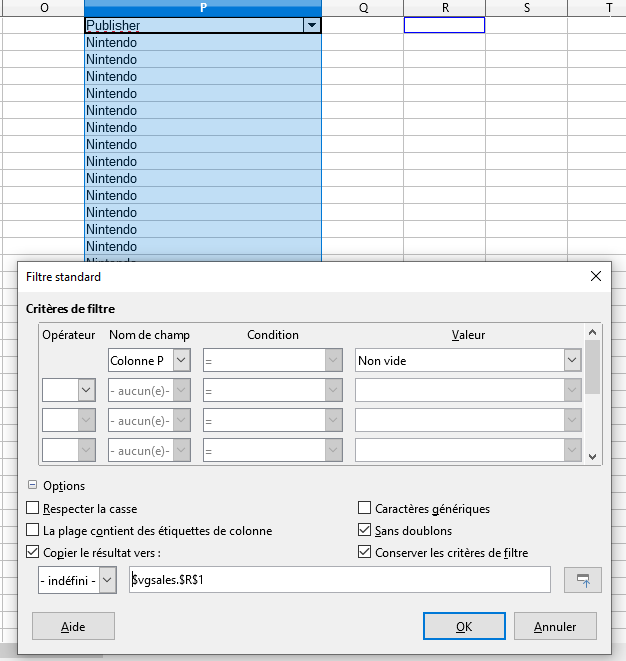

- On sélectionne la colonne à traiter
- donnée -> plus de filtre -> filtre standard
- on sélectionne valeurs non vide
- sans doublons
- l'endroit où l'on veut mettre les résultats

L'affichage se fera dans l'ordre d'apparition des noms. Ensuite on exporte le résultat dans un fichier csv qu'on va importer dans la base.


Le résultat obtenu avec le code présenté précédemment peut également être réalisé sur tableur via la fonction RECHERCHEV.

Pour ce faire, on doit avoir la table avec les valeurs qualitatives, une table vide, une matrice de 2 colonnes avec une colonne contenant les noms uniques et l'autre leur id. La matrice doit être organisée par ordre alphabétique et les celluloes doivent avoir le même format: texte pour le texte, nombre pour les valeurs numériques


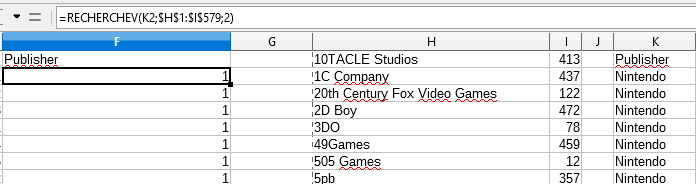

### Création des procédures

##### procédure qui affiche les jeux d'un genre donné

````SQL    
    delimiter //
        create procedure jeu_genre 
        (in genres varchar (50))
        begin 
            SELECT nom_jeu, nom_plateforme, annee, nom_genre, nom_publisher, global_sales 
            FROM ventes 
            JOIN genre on genre.id_genre = ventes.id_genre
            JOIN plateforme on plateforme.id_plateforme = ventes.id_plateforme
            JOIN publisher on publisher.id_publisher = ventes.id_publisher
            WHERE nom_genre = genres
            ORDER by global_sales;
        end //
    delimiter ;
    
    call jeu_genre ()
````

##### procédure qui affiche les jeux en fonction de la plateforme

````SQL
    delimiter //
        create procedure jeu_plateforme 
        (in plateformes varchar (50))
        begin 
            SELECT * 
            FROM ventes 
            JOIN plateforme on plateforme.id_plateforme = ventes.id_plateforme
            WHERE plateforme = plateformes;
        end //
    delimiter ; 
    
    call jeu_plateforme ()
````

##### procédure qui affiche les jeux en fonction du publisher

````SQL
    delimiter //
        create procedure jeu_publisher 
        (in publishers varchar (100))
        begin 
            select * 
            from ventes 
            join publisher on publisher.id_publisher = ventes.id_publisher
            where publisher = publishers;
        end //
    delimiter ; 

    call jeu_publisher ()
````

##### affichage des jeux pour une date précise

````SQL    
    delimiter //
        create procedure jeu_date_fixe 
        (in annee_fixe int (4))
        begin 
            select * 
            from ventes 
            where annee = annee_fixe;
        end //
    delimiter ; 
    
    call jeu_date_fixe ()
````

##### affichage des jeux qui sont sortis après une date donnée

````SQL
    delimiter //
        create procedure jeu_date_sup 
        (in annee_sup int (4))
        begin 
            select * 
            from ventes 
            where annee > annee_sup;
        end //
    delimiter ; 
    
    call jeu_date_sup ()
````

##### affichage des jeux qui sont sortis avant une date donnée

````SQL
    delimiter //
        create procedure jeu_date_inf 
        (in annee_inf int (4))
        begin 
            select * 
            from ventes 
            where annee < annee_inf;
        end //
    delimiter ; 
    
    call jeu_date_inf ()
````

##### affichage des jeux dont les ventes globales sont suppérieures à une quantitée donnée

````SQL
    delimiter //
        create procedure jeu_global_sup
        (in global_sup int (4))
        begin 
            select * 
            from ventes 
            where Global_sales > global_sup;
        end //
    delimiter ;
    
    call jeu_global_sup ()
````

##### affichage des jeux dont les ventes globales sont inférieures à une quantitée donnée

````SQL
    delimiter //
        create procedure jeu_global_inf
        (in global_inf int (4))
        begin 
            select * 
            from ventes 
            where Global_sales < global_inf;
        end //
    delimiter ;
    
    call jeu_global_inf ()
````

##### récupération des plateformes, années et ventes globales

````SQL
    DELIMITER |
        CREATE PROCEDURE sales_year_platform()
        BEGIN
            SELECT plateforme.nom_plateforme, ventes.annee, ventes.Global_sales FROM ventes 
            INNER JOIN plateforme ON plateforme.id_plateforme = ventes.id_plateforme;
        END |
    DELIMITER ;

    call sales_year_platform()
````

### Création des vues


##### vue de la table reprenant les noms de jeu, genre, publisher, année de sortie, plateforme, ventes globales

````SQL
create view v_ventes AS
    select ventes.nom_jeu, genre.nom_genre, publisher.nom_publisher, ventes.annee, plateforme.nom_plateforme, ventes.global_sales from ventes
    join publisher on publisher.id_publisher = ventes.id_publisher
    join genre on genre.id_genre = ventes.id_genre
    join plateforme on plateforme.id_plateforme = ventes.id_plateforme;

select * from v_ventes;
````

##### vue de la table reprenant le genre et ventes globales

````SQL
create view v_genre_vglobal AS
    select genre.nom_genre, ventes.global_sales from ventes
    join genre on genre.id_genre = ventes.id_genre
    order by global_sales desc

select * from v_genre_vglobal 
````